# Importing data

In [1]:
import numpy as np
import pandas as pd
try:
    from single_nn import Layer
    from neural_net import neural_network
except:
    from .single_nn import Layer
    from .neural_net import neural_network
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv("Dataset/mnist_train.csv")
y_train = train['label']
X_train = train.drop("label", 1)
# Normalising data
X_train = X_train / 255
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
test = pd.read_csv("Dataset/mnist_test.csv")
y_test = test['label']
X_test = test.drop("label", 1)
X_test = X_test / 255
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Some sample data is shown below from the training data.

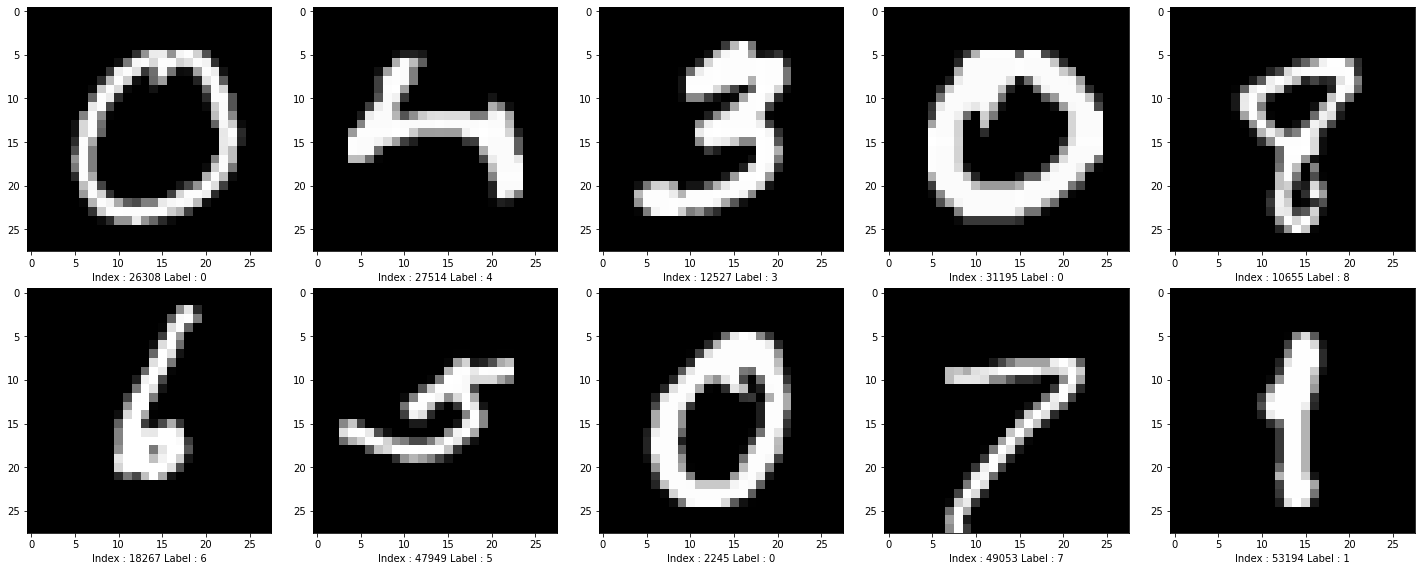

In [4]:
fig = plt.figure(figsize=(20,8))
index = np.random.randint(0, X_train.shape[0]-1, size=10)
for j,i in enumerate(index):
    img = np.array(X_train.iloc[i, :]).reshape(28,28)
    fig.add_subplot(2,5,j+1)
    plt.imshow(img, cmap='gray')
    plt.xlabel("Index : {} Label : {}".format(i, y_train.iloc[i]))
plt.tight_layout()
plt.show()

# Creating Model

In [5]:
model = neural_network([
    Layer(X_train.shape[1], type="input"),
    Layer(32, activation="relu"),
    Layer(16, activation="relu"),
    Layer(10, activation="softmax", type="output")
])

In [6]:
np.array(X_train.T).shape

(784, 60000)

The model fitting may take about 45 minutes to train. So sitback and relax.

In [7]:
costs = model.fit(X_train, y_train, n_epochs=1000, verbose=100, learning_rate=0.05, mini_batch_size=128)

Cost after 0 epochs is 1.1233262253870469 . Elapsed Time :  2.266634702682495
Cost after 100 epochs is 0.09167781351783852 . Elapsed Time :  322.1492409706116
Cost after 200 epochs is 0.0794658173229441 . Elapsed Time :  341.1618883609772
Cost after 300 epochs is 0.04482932053126005 . Elapsed Time :  342.7569577693939
Cost after 400 epochs is 0.029505300023108874 . Elapsed Time :  336.48828506469727
Cost after 500 epochs is 0.03196840527300394 . Elapsed Time :  394.9489657878876
Cost after 600 epochs is 0.0213336633537827 . Elapsed Time :  398.50285482406616
Cost after 700 epochs is 0.023621624879353306 . Elapsed Time :  409.89884638786316
Cost after 800 epochs is 0.015361053554137787 . Elapsed Time :  352.4467203617096
Cost after 900 epochs is 0.008247287978075134 . Elapsed Time :  320.0814938545227
Cost after 1000 epochs is 0.005879888470830213. Elapsed Time : 320.0814938545227


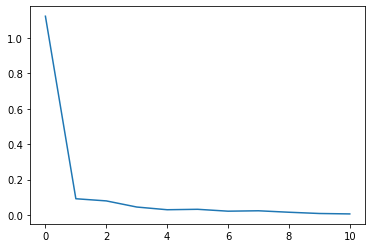

In [18]:
plt.plot(costs)
plt.show()

In [9]:
X_test.T.shape

(784, 10000)

In [10]:
index = 59
predictions = model.predict(np.array(X_test).T)

In [11]:
model.compute_cost(predictions, np.array(pd.get_dummies(y_test.loc[:]).T))

3.2410418616739225

In [12]:
# print("Label is",y_test.loc[index],"and predicted label is",predictions.argmax(axis=0))

# Saving model

The final weights and biases formed by training is saved in cache.npy, so that this can be retrieved by using model.retrieve_weights(filename)

In [13]:
model.cache_weights()

Weights and biases saved in file cache.npy
